In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [3]:
#run_modeを選択 "regular" or "kfold"
run_mode = "kfold"

#datanameを選択
data_name = "CH_data"

#変えた値を選択:"dropout" or "seed"
change_name_dir = "dropout"

#optionを選択:dropout -> ["wide" or "detail"], seed -> "seed"
change_name = "wide"

#failを開く
with open(f'result/{change_name_dir}/{data_name}_{change_name}_{run_mode}_log.txt', 'r') as f:
    data = json.load(f)

data

{'0.0_mae': 0.18649381399154663,
 '0.0_rmse': 0.24054176544432135,
 '0.2_mae': 0.1955001801252365,
 '0.2_rmse': 0.259316493525156,
 '0.4_mae': 0.20930835604667664,
 '0.4_rmse': 0.273324984153043,
 '0.6_mae': 0.2769641578197479,
 '0.6_rmse': 0.3523412873547888,
 '0.8_mae': 0.5311750173568726,
 '0.8_rmse': 0.6381883569961396}

In [5]:
if change_name == "wide":
    index = [0.0, 0.2, 0.4, 0.6, 0.8]
elif change_name == "detail":
    index = [0.3, 0.34, 0.38, 0.42, 0.46]
elif change_name == "seed":
    index = [42, 666, 2023, 1, 3]

if run_mode == "regular":
    columns = ['train_mae', 'train_rmse', 'test_mae', 'test_rmse']
elif run_mode == "kfold":
    columns = ["MAE", "RMSE"]

data = {c: [data[f'{i}_{c.lower()}'] for i in index] for c in columns}
df = pd.DataFrame(data, index=index)

print(df)
#columnsとindexを入れ替える
df = df.T

          MAE      RMSE
0.0  0.186494  0.240542
0.2  0.195500  0.259316
0.4  0.209308  0.273325
0.6  0.276964  0.352341
0.8  0.531175  0.638188


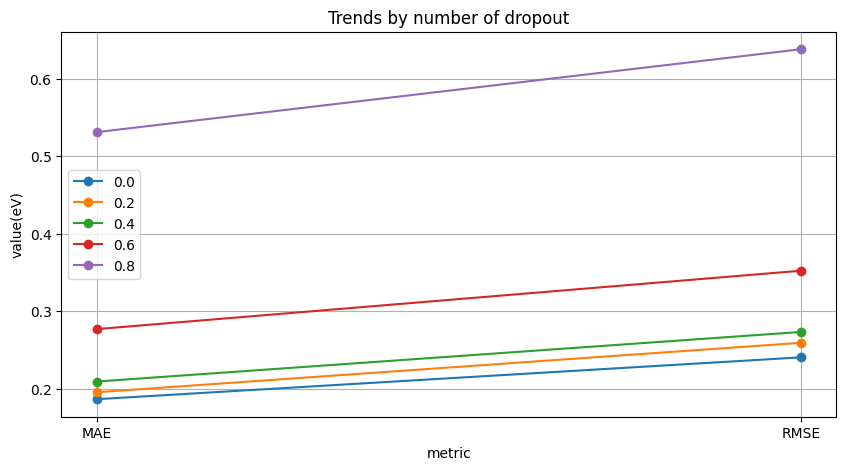

In [6]:
# グラフをプロット
plt.figure(figsize=(10, 5))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)
plt.legend()
plt.xlabel('metric')
plt.ylabel('value(eV)')
plt.title('Trends by number of dropout')
plt.grid(True)
plt.savefig(f"resultplot/comparison_{change_name_dir}_{change_name}.png")
plt.show()
